In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# np.set_printoptions(precision=3)
from scipy.stats import linregress
from scipy.optimize import curve_fit
R = 8.3145 # j/mol.K

In [2]:
n = np.arange(1, 6)
T = np.arange(30, 55, 5) # Temperature
T_k = T + 273.15
T_rev = 1 / T_k

S = np.array([64, 58, 35, 28, 22])
logS = np.log10(S)

d = {
    'n': n,
    'T': T,
    'T(K)': T_k,
    '1/T(K)': T_rev,
    'S': S,
    'log(S)': logS,
}

df = pd.DataFrame(d)
df.set_index('n')

,T,T(K),1/T(K),S,log(S)
n,,,,,
1,30,303.15,0.003299,64,1.806180
2,35,308.15,0.003245,58,1.763428
3,40,313.15,0.003193,35,1.544068
4,45,318.15,0.003143,28,1.447158
5,50,323.15,0.003095,22,1.342423


In [3]:
line = linregress(T_rev, logS)
w, b = line[0], line[1]

Ea = 2.23 * R * w
print(f'line: y = {w}x + {b}')
print(f'Ea = 2.23R * slope = {Ea}')

line: y = 2436.248211150287x + -6.203131108105585
Ea = 2.23R * slope = 45171.294226088205


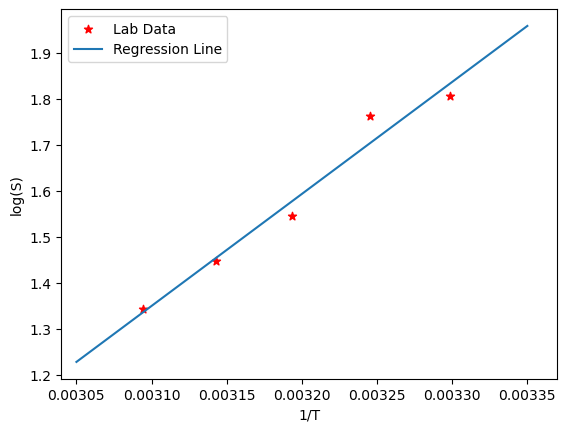

In [4]:
plt.scatter(T_rev, logS, marker='*', c='r', label='Lab Data')

x = np.linspace(0.00305, 0.00335, 200)
plt.plot(x, w*x+b, label='Regression Line')
plt.xlabel('1/T')
plt.ylabel('log(S)')
plt.xlim(0.00304, 0.00337)
plt.legend()
plt.show()
# plt.savefig('p')

In [5]:
def S_to_T(S):
    return w / (np.log10(S) - b)

print(f'if S = 50s: T = {S_to_T(50)}')
print(f'if S = 15s: T = {S_to_T(15)}')

if S = 50s: T = 308.30385191028404
if S = 15s: T = 330.14972173653223


In [6]:
def T_to_S(T):
    return pow(10,((w/T) + b))

print(f'if T = 52: S = {T_to_S(52+273.15)}')
print(f'if T = 68: S = {T_to_S(68+273.15)}')

if T = 52: S = 19.478659647893085
if T = 68: S = 8.67262308625992
